# Mixture of Gaussians BEAM Demo

### Step 1: Load all necessary modules and generate the data

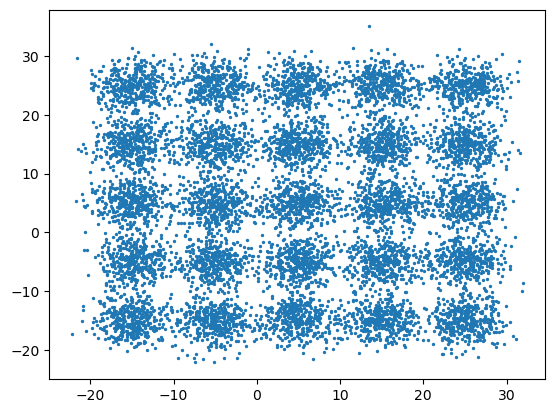

In [11]:
import os, sys
directory_path = os.path.dirname(os.path.abspath("__notebook__"))
sys.path.append('../')
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from beam import BEAM, load

def gaussian_grid(width, height, scale, n_total_samples):
    cov = np.eye(2) * scale
    samples_per_center = int(n_total_samples / (width * height))
    X = []
    for i in range(height):
        for j in range(width):
            mean = np.array([i, j])
            X.append(np.random.multivariate_normal(mean, cov, 
                                                   samples_per_center))
    final = np.vstack(X)
    final[:, 0] -= (height - 1) / 2
    final[:, 1] -= (width - 1) / 2
    return final

X = gaussian_grid(5, 5, 0.05, 10000) * 10 + 5
np.random.shuffle(X)
img = plt.scatter(x=X[:, 0], y=X[:, 1], s=2)

### Step 2: Train the RBM (no adversary)

In [12]:
model = BEAM(
    n_vis=2,
    n_hid=20
)
model.fit(
    X = X,
    n_gibbs=1,
    lr=0.01,
    n_epochs=400,
    batch_size=50,
    gamma=1,
    gamma_delay=25,
    rng_seed=0,
    verbose=True,
    checkpoint_path=f'{directory_path}/beam_checkpoints/beam_mog_demo.pth'
)

epoch: 005 of 400 | recon_loss: 16.31800079345703
epoch: 010 of 400 | recon_loss: 8.53499984741211
epoch: 015 of 400 | recon_loss: 5.828999996185303
epoch: 020 of 400 | recon_loss: 4.776000022888184
epoch: 025 of 400 | recon_loss: 4.295000076293945
epoch: 030 of 400 | recon_loss: 3.7739999294281006
epoch: 035 of 400 | recon_loss: 3.618000030517578
epoch: 040 of 400 | recon_loss: 3.493000030517578
epoch: 045 of 400 | recon_loss: 3.3269999027252197
epoch: 050 of 400 | recon_loss: 2.9709999561309814
epoch: 055 of 400 | recon_loss: 2.8459999561309814
epoch: 060 of 400 | recon_loss: 2.6429998874664307
epoch: 065 of 400 | recon_loss: 2.3550000190734863
epoch: 070 of 400 | recon_loss: 2.3420000076293945
epoch: 075 of 400 | recon_loss: 2.249000072479248
epoch: 080 of 400 | recon_loss: 2.078000068664551
epoch: 085 of 400 | recon_loss: 2.0859999656677246
epoch: 090 of 400 | recon_loss: 1.9500000476837158
epoch: 095 of 400 | recon_loss: 2.0290000438690186
epoch: 100 of 400 | recon_loss: 1.7890000

### Step 3: Visualize the learned distribution

tensor([4.8062, 4.1548], grad_fn=<ExpBackward0>)


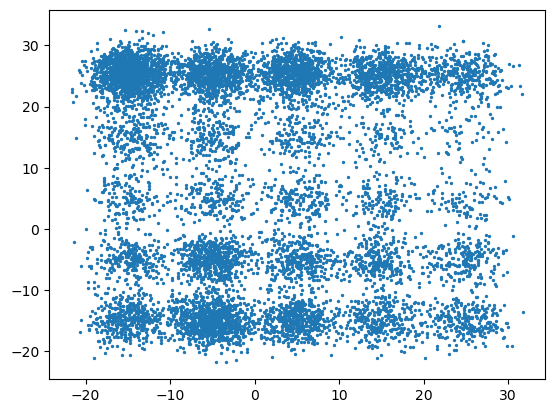

In [13]:
model = load(f'{directory_path}/beam_checkpoints/beam_mog_demo.pth',
                 f'{directory_path}/beam_checkpoints/beam_mog_demo.json')
print(model._variance())
samples = model.reconstruct(
    np.zeros((10000, 2)), n_gibbs=200
)
img = plt.scatter(x=samples[:, 0], y=samples[:, 1], s=2)

### Repeat Step 2 for BEAM with adversarial training

In [14]:
model_adversarial = BEAM(
    n_vis=2,
    n_hid=20
)
model_adversarial.fit_autograd(
    X = X,
    n_gibbs=1,
    lr=0.01,
    n_epochs=400,
    batch_size=100,
    gamma=0.001,
    gamma_delay=100,
    rng_seed=0,
    verbose=True,
    checkpoint_path=f'{directory_path}/beam_checkpoints/beam_mog_demo_adv.pth'
)

epoch: 005 of 400 | recon_loss: 38.983001708984375
epoch: 010 of 400 | recon_loss: 18.31399917602539
epoch: 015 of 400 | recon_loss: 12.128000259399414
epoch: 020 of 400 | recon_loss: 9.437999725341797
epoch: 025 of 400 | recon_loss: 7.802999973297119
epoch: 030 of 400 | recon_loss: 6.752999782562256
epoch: 035 of 400 | recon_loss: 6.010000228881836
epoch: 040 of 400 | recon_loss: 5.480000019073486
epoch: 045 of 400 | recon_loss: 5.061999797821045
epoch: 050 of 400 | recon_loss: 4.734000205993652
epoch: 055 of 400 | recon_loss: 4.563000202178955
epoch: 060 of 400 | recon_loss: 4.388999938964844
epoch: 065 of 400 | recon_loss: 4.1539998054504395
epoch: 070 of 400 | recon_loss: 3.7200000286102295
epoch: 075 of 400 | recon_loss: 3.5280001163482666
epoch: 080 of 400 | recon_loss: 3.361999988555908
epoch: 085 of 400 | recon_loss: 3.3289999961853027
epoch: 090 of 400 | recon_loss: 3.0880000591278076
epoch: 095 of 400 | recon_loss: 2.7950000762939453
epoch: 100 of 400 | recon_loss: 2.91400003

### Repeat Step 3 for BEAM adversarial traiing

tensor([5.7950, 4.8307], grad_fn=<ExpBackward0>)


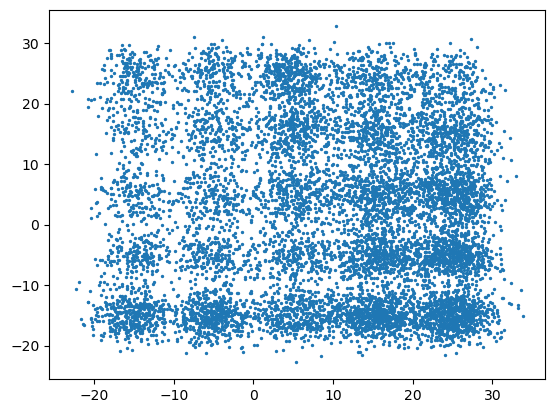

In [15]:
model = load(f'{directory_path}/beam_checkpoints/beam_mog_demo_adv.pth',
                 f'{directory_path}/beam_checkpoints/beam_mog_demo_adv.json')
print(model._variance())
samples = model.reconstruct(
    np.zeros((10000, 2)), n_gibbs=200
)
img = plt.scatter(x=samples[:, 0], y=samples[:, 1], s=2)